### Получение контуров методами математической морфологии

In [10]:
import os    
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [11]:
!pip install scipy

In [12]:
from scipy import ndimage
import torch
import torch.utils.data as data_utils
import matplotlib.pyplot as plt

In [13]:
valid = torch.load('./data/valid.pt')

In [14]:
contours = []
for img in valid.tensors[0]:
    dilation_res = ndimage.grey_dilation(img, size=(3,3))
    erosion_res = ndimage.grey_erosion(img, size=(1,1))
    res = dilation_res - erosion_res
    contours.append(res)

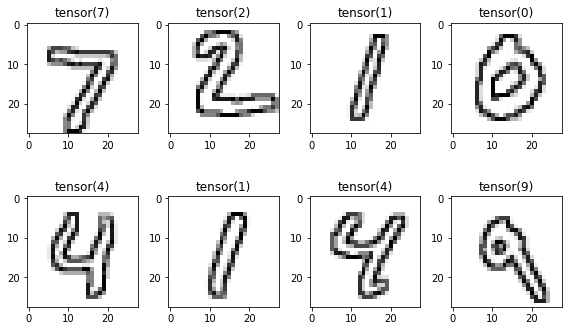

In [15]:
rows = 2
cols = 4

fig = plt.figure(figsize=(8,6))

for i in range(1, cols*rows + 1):
    fig.add_subplot(rows, cols, i)
    plt.imshow(255-contours[i-1], cmap='gray')
    plt.title(valid.tensors[1][i-1])
    fig.tight_layout()

In [16]:
contours_tensor = torch.Tensor(contours)

In [17]:
res = data_utils.TensorDataset(contours_tensor, valid.tensors[1])

In [18]:
torch.save(res, 'morphology_contours.pt')